# Project: Star Wars 

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: 

    Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

In [50]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [52]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [53]:
#extract columns for ease of use
sw_columns = star_wars.columns

In [54]:
# STEP 1: remove columns with respondentID = NaN
star_wars['RespondentID'].isnull().sum() #only one row
star_wars.dropna(subset=['RespondentID'], inplace=True)

In [55]:
# STEP 2: Convert columns 1 and 2 (see names) to boolean
yes_no = {"Yes": True, "No": False}

star_wars[sw_columns[1]] = star_wars[sw_columns[1]].map(yes_no)
star_wars[sw_columns[2]] = star_wars[sw_columns[2]].map(yes_no)

In [56]:
# Step 3: convert columns 3 to 8 to boolean. Include NaN = False

map1={'Star Wars: Episode I  The Phantom Menace': True, np.nan:False}
map2={'Star Wars: Episode II  Attack of the Clones': True, np.nan:False}
map3={'Star Wars: Episode III  Revenge of the Sith': True, np.nan:False}
map4={'Star Wars: Episode IV  A New Hope': True, np.nan:False}
map5={'Star Wars: Episode V The Empire Strikes Back': True, np.nan:False}
map6={'Star Wars: Episode VI Return of the Jedi': True, np.nan:False}

star_wars[sw_columns[3]] = star_wars[sw_columns[3]].map(map1)
star_wars[sw_columns[4]] = star_wars[sw_columns[4]].map(map2)
star_wars[sw_columns[5]] = star_wars[sw_columns[5]].map(map3)
star_wars[sw_columns[6]] = star_wars[sw_columns[6]].map(map4)
star_wars[sw_columns[7]] = star_wars[sw_columns[7]].map(map5)
star_wars[sw_columns[8]] = star_wars[sw_columns[8]].map(map6)

In [57]:
# Step 4: remane columns 3 to 8 for ease
star_wars = star_wars.rename(columns={sw_columns[3]:'seen_1',
                                     sw_columns[4]:'seen_2',
                                     sw_columns[5]:'seen_3',
                                     sw_columns[6]:'seen_4',
                                     sw_columns[7]:'seen_5',
                                     sw_columns[8]:'seen_6'})

In [58]:
#reload columns string
sw_columns = star_wars.columns

In [59]:
# Step 5: convert columns 9 to 14 to numeric values
star_wars[sw_columns[9:15]] = star_wars[sw_columns[9:15]].astype(float)

In [60]:
# Step 6: rename columns 9 to 14
star_wars = star_wars.rename(columns={sw_columns[9]:'ranking_1',
                                     sw_columns[10]:'ranking_2',
                                     sw_columns[11]:'ranking_3',
                                     sw_columns[12]:'ranking_4',
                                     sw_columns[13]:'ranking_5',
                                     sw_columns[14]:'ranking_6'})

In [61]:
#reload columns string
sw_columns = star_wars.columns

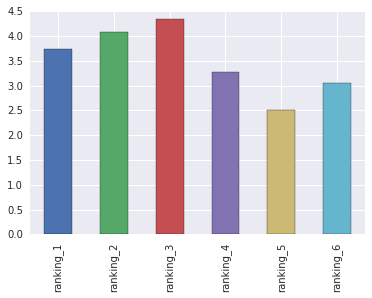

In [62]:
# Step 7: Find top-ranking movie
star_wars.mean()[sw_columns[9:15]].plot.bar()

Observations:
    - Aligned with the original hypothesis, 'The Empire Strikes Back'is regarded as the best movie based on ranking (2.5/6).
    
    - Also interesting the first three movies (ranking 4 to 6) are ranked higher than the more modern ones (ranking 1 to 3).

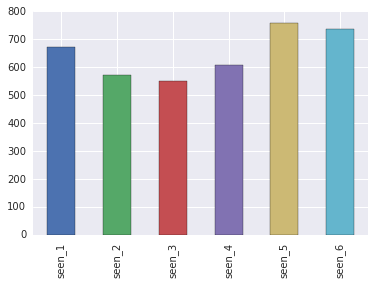

In [63]:
# Step 8: Calculate sum of "seen" columns (bool)
star_wars.sum(axis=0)[sw_columns[3:9]].plot.bar()

Observations:
    - The results show that the last two movies of the first series are the ones that people wayched the most. These results makes sense based on the popularity and the introduction year.

In [64]:
#Step 9: Analysis by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

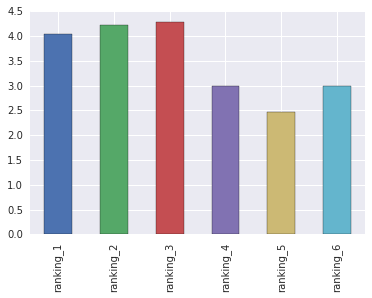

In [65]:
# Step 9.1: Find top-ranking movie among males
males.mean()[sw_columns[9:15]].plot.bar()

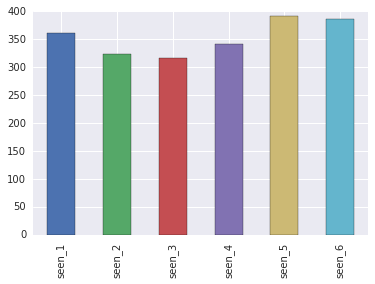

In [66]:
# Step 9.2: Calculate sum of "seen" columns (bool) men
males.sum(axis=0)[sw_columns[3:9]].plot.bar()

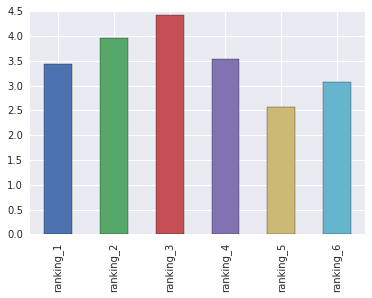

In [67]:
# Step 9.3: Find top-ranking movie among women
females.mean()[sw_columns[9:15]].plot.bar()

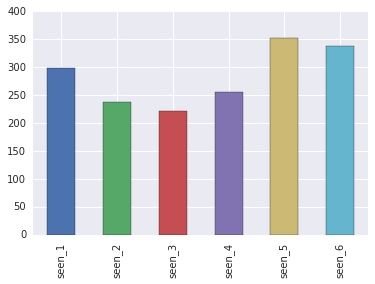

In [68]:
# Step 9.2: Calculate sum of "seen" columns (bool) female
females.sum(axis=0)[sw_columns[3:9]].plot.bar()

Observations:
    - Ranking: men tend to rank the first 3 movies higher than women. This difference is the highest with Episode I (high-ranked by women and low-ranked by men).
    - Seen: men are more consistent in watching all the episodes than women.

In [69]:
#Step 10: rating among fans/ no fans of star wars
fan = star_wars[star_wars[sw_columns[2]] == True]
no_fan = star_wars[star_wars[sw_columns[2]] == False]

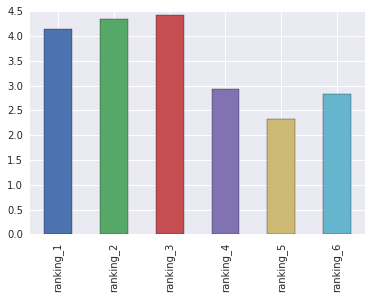

In [70]:
# Step 10.1: Find top-ranking movie among fans
fan.mean()[sw_columns[9:15]].plot.bar()

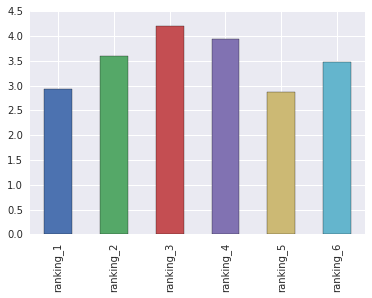

In [71]:
# Step 10.2: Find top-ranking movie among fans
no_fan.mean()[sw_columns[9:15]].plot.bar()

Observations:
    - fans consistently rank the last 3 episodes higher than the first three ones.
    - no_fans repeat a similar pattern except for Episode I (higher rating) and Episode IV (lower rating).

# Next Steps

- Segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?


- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?

In [72]:
# Step 11: Segmentation: Education
ed_map = {'Some college or Associate degree': 'high',
         'Bachelor degree':'high',
         'Graduate degree':'high',
         'High school degree':'low',
         'Less than high school degree ':'low'}

#star_wars['Education'].value_counts()
star_wars['Education_hl'] = star_wars['Education'].map(ed_map)
star_wars['Education_hl'].value_counts()

high    924
low     105
Name: Education_hl, dtype: int64

In [73]:
# Step 11.1: Rating among high/low education
ed_high = star_wars[star_wars['Education_hl'] == "high"]
ed_low = star_wars[star_wars['Education_hl'] == 'low']

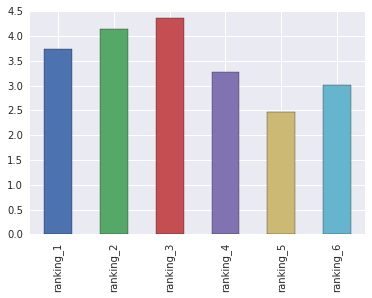

In [77]:
#Step 11.2:  Find top-ranking movie high ed
ed_high.mean()[sw_columns[9:15]].plot.bar()

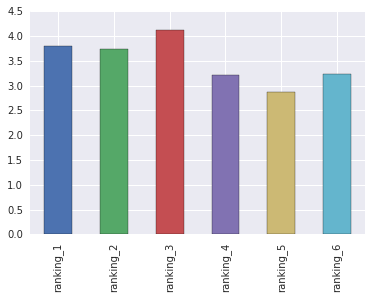

In [76]:
# Step 11.3: Find top-ranking movie high ed
ed_low.mean()[sw_columns[9:15]].plot.bar()

Observation:
    - The differences in ranking among the first and las 3 episodes is wider for the highly educated respondends.
    - ed_high ranked episodes 4 to 6 higher than ed_low 